# CS 240 Homework-2
### Ahmet Öztemiz - 213010595

In [1]:
import nsfg
import thinkstats2
import thinkplot
import pandas as pd
import numpy as np

### Question 1

In [2]:
resp = nsfg.ReadFemResp(dct_file='2002FemResp.dct', dat_file='2002FemResp.dat.gz', nrows=None)

In [3]:
resp["hieduc"]
school = resp.loc[resp['hieduc'] < 11]
university = resp.loc[resp['hieduc'] > 10]

In [4]:
print ("Number of respondents who are not finished any collage/university degree: {}".format(len(school)))
print ("Number of respondents are finished at least one collage degree: {}".format(len(university)))

Number of respondents who are not finished any collage/university degree: 5498
Number of respondents are finished at least one collage degree: 2145


"agemomb1" column have categorical values and we can check from link below:
https://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7868&srtLabel=606820

Also, our descriptive statistics does not reflect useful informations because we cannot reach exact values for mothers fist birth age(just categoric values). For example, when we calculate max or min values, we will get categoric values such as, 1 and 96.

We can see that 1 for minimum value means LESS THAN 18 YEARS and 96 symbolize MOTHER-FIGURE HAD NO CHILDREN to us.

In [5]:
school["agemomb1"].describe()

count    5498.000000
mean        3.827210
std        10.677571
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        96.000000
Name: agemomb1, dtype: float64

In [6]:
university["agemomb1"].describe()

count    2145.000000
mean        4.379021
std        11.142874
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        96.000000
Name: agemomb1, dtype: float64

In [7]:
print "Minimum value of agemomb1 column for university df: {}".format(university["agemomb1"].min())
print "Minimum value of agemomb1 column for school df: {} \n".format(school["agemomb1"].min())

print "Maximum value of agemomb1 column for university df: {}".format(university["agemomb1"].max())
print "Maximum value of agemomb1 column for school df: {} \n".format(school["agemomb1"].max())

print "Standard deviation of agemomb1 column for university df: {}".format(university["agemomb1"].std())
print "Standard deviation of agemomb1 column for school df: {} \n".format(school["agemomb1"].std())

print "Variance of agemomb1 column for university df: {}".format(university["agemomb1"].var())
print "Variance of agemomb1 column for school df: {} \n".format(school["agemomb1"].var())

print "Mean of agemomb1 column for university df: {}".format(university["agemomb1"].mean())
print "Mean of agemomb1 column for school df: {} \n".format(school["agemomb1"].mean())

print "Skewness of agemomb1 column for university df: {} \n".format(university["agemomb1"].skew())
print "Skewness of agemomb1 column for school df: {} \n".format(school["agemomb1"].skew())

Minimum value of agemomb1 column for university df: 1
Minimum value of agemomb1 column for school df: 1 

Maximum value of agemomb1 column for university df: 96
Maximum value of agemomb1 column for school df: 96 

Standard deviation of agemomb1 column for university df: 11.1428742027
Standard deviation of agemomb1 column for school df: 10.6775710634 

Variance of agemomb1 column for university df: 124.163645496
Variance of agemomb1 column for school df: 114.010523813 

Mean of agemomb1 column for university df: 4.37902097902
Mean of agemomb1 column for school df: 3.82720989451 

Skewness of agemomb1 column for university df: 8.04040585377 

Skewness of agemomb1 column for school df: 8.42352714574 



### Question 2

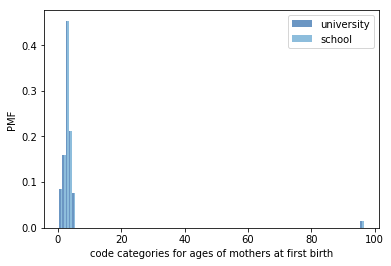

In [8]:
first_pmf = thinkstats2.Pmf(university["agemomb1"], label='university')
other_pmf = thinkstats2.Pmf(university["agemomb1"], label='school')
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=0.5)
thinkplot.Hist(other_pmf, align='left', width=0.5)
thinkplot.Config(xlabel='code categories for ages of mothers at first birth', ylabel='PMF')

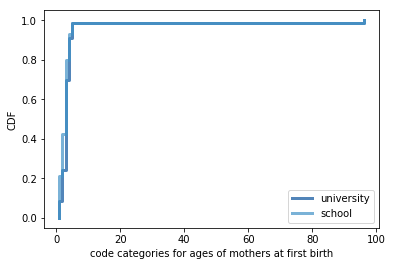

In [9]:
cdf_university = thinkstats2.Cdf(university["agemomb1"], label='university')
cdf_school = thinkstats2.Cdf(school["agemomb1"], label='school')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_university, cdf_school])
thinkplot.Config(xlabel='code categories for ages of mothers at first birth', ylabel='CDF', width = 0.5)

### Question 3 

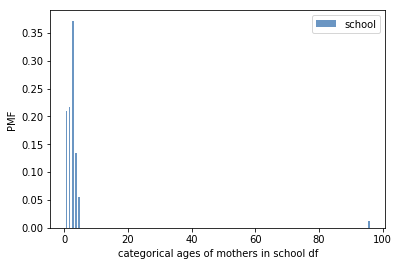

In [10]:
school_pmf = thinkstats2.Pmf(school["agemomb1"], label='school')
thinkplot.PrePlot(2)
thinkplot.Hist(school_pmf, align='right', width=0.5)
thinkplot.Config(xlabel='categorical ages of mothers in school df', ylabel='PMF')

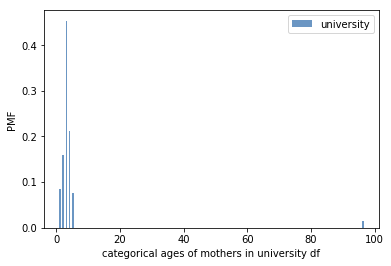

In [11]:
uni_pmf = thinkstats2.Pmf(university["agemomb1"], label='university')
thinkplot.PrePlot(2)
thinkplot.Hist(uni_pmf, align='left', width=0.5)
thinkplot.Config(xlabel='categorical ages of mothers in university df', ylabel='PMF')

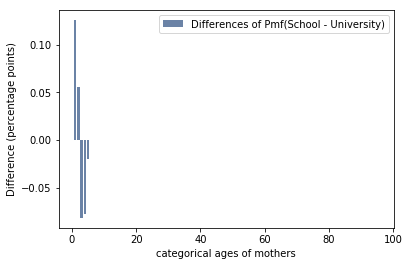

In [12]:
school_pmf = thinkstats2.Pmf(school["agemomb1"], label='firsts')
uni_pmf = thinkstats2.Pmf(university["agemomb1"], label='others')

weeks = range(1, 96)
diffs = []
for week in weeks:
    p1 = school_pmf.Prob(week)
    p2 = uni_pmf.Prob(week)
    diff = (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs, label="Differences of Pmf(School - University)")
thinkplot.Config(xlabel='categorical ages of mothers', ylabel='Difference (percentage points)')

### Question 4

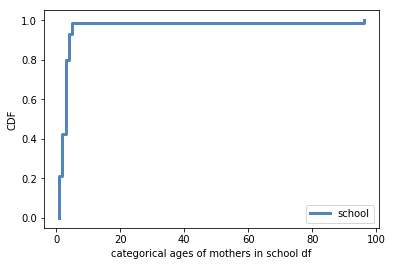

In [13]:
cdf_school = thinkstats2.Cdf(school["agemomb1"], label='school')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_school])
thinkplot.Config(xlabel='categorical ages of mothers in school df', ylabel='CDF', width = 0.5)

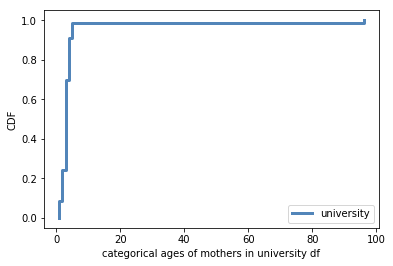

In [14]:
cdf_university = thinkstats2.Cdf(university["agemomb1"], label='university')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_university])
thinkplot.Config(xlabel='categorical ages of mothers in university df', ylabel='CDF', width = 0.5)

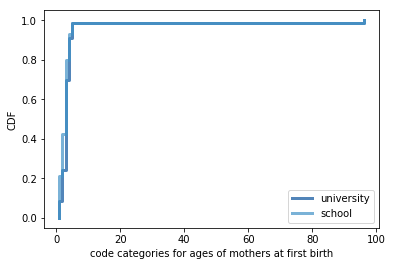

In [15]:
cdf_university = thinkstats2.Cdf(university["agemomb1"], label='university')
cdf_school = thinkstats2.Cdf(school["agemomb1"], label='school')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_university, cdf_school])
thinkplot.Config(xlabel='code categories for ages of mothers at first birth', ylabel='CDF', width = 0.5)

In [16]:
print "Probability of mothers who had first at less than\
 18 years old in school df: {}".format(cdf_school.Prob(1))
print "Probability of mothers who had first at less than\
 18 years old in university df: {}".format(cdf_university.Prob(1))

Probability of mothers who had first at less than 18 years old in school df: 0.20953073845
Probability of mothers who had first at less than 18 years old in university df: 0.0839160839161


In [17]:
university_list = sorted(university["agemomb1"].values)
school_list = sorted(school["agemomb1"].values)

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

under_school_rank = PercentileRank(school_list, 1)
over_school_rank = PercentileRank(school_list, 5)

under_uni_rank = PercentileRank(university_list, 1)
over_uni_rank = PercentileRank(university_list, 5)

print "Percentile rank of mothers are 18 and older than \
18 years old in school df: from {} to {}".format(under_school_rank, over_school_rank)
print "Percentile rank of mothers are 18 and older than \
18 years old in university df: from {} to {}".format(under_uni_rank, over_uni_rank)

Percentile rank of mothers are 18 and older than 18 years old in school df: from 20.953073845 to 98.6904328847
Percentile rank of mothers are 18 and older than 18 years old in university df: from 8.39160839161 to 98.5547785548


### Question 5

I selected first marriage age column and number of marriage column then we can compare that if they married in early ages then it will affect long or short marriages.

In [18]:
marriage_age = resp["fmar1age"]
num_of_marriage = resp["fmarno"]

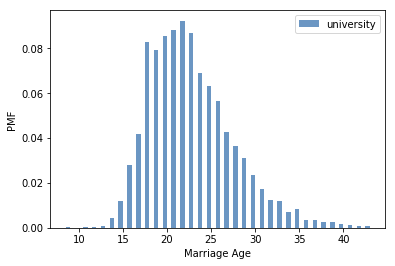

In [19]:
age_mar_pmf = thinkstats2.Pmf(marriage_age, label='university')
thinkplot.PrePlot(2)
thinkplot.Hist(age_mar_pmf, align='right', width=0.5)
thinkplot.Config(xlabel='Marriage Age', ylabel='PMF')

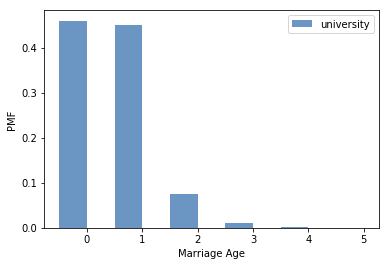

In [20]:
num_mar_pmf = thinkstats2.Pmf(num_of_marriage, label='university')
thinkplot.PrePlot(2)
thinkplot.Hist(num_mar_pmf, align='right', width=0.5)
thinkplot.Config(xlabel='Marriage Age', ylabel='PMF')

In [21]:
from scipy.stats import norm,expon
import matplotlib.pyplot as plt
import numpy as np
resp.dropna(axis=1, how='any')
array = resp.as_matrix(columns=["fmar1age", "fmarno"])
parameters = norm.fit(array)
x = np.linspace(-5,5,100)
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])
normal_pdf = norm.pdf(x)

/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/usr/local/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


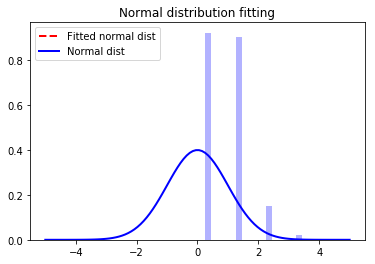

In [22]:
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(array,normed=1,color=["cyan", "blue"],alpha=.3)
plt.title("Normal distribution fitting")
plt.legend()

plt.show()